In [22]:
import os, shutil
from keras.models import load_model
import cv2
import pandas as pd
import subprocess as s
import os
os.environ['PYGAME_HIDE_SUPPORT_PROMPT'] = "hide"
import pygame
from skimage.transform import resize
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from tsmoothie.smoother import *
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
folder = 'frames'
print('[!] Deleting contents of frame/..')
time.sleep(2)

for filename in tqdm(os.listdir(folder)):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

[!] Deleting contents of frame/..


100%|██████████| 644/644 [00:00<00:00, 6194.69it/s]


In [14]:
print('[!] Detecting')

model = load_model('weights/ResNet-50.h5')
video = cv2.VideoCapture('input/input.mp4')
path = 'xml/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(path)

text = ''
found = 0
index = 0
data = {
    'frame' : [],
    'class' : []
}


while True:
    _, frame = video.read()
    if _:
         # Convert to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Detect faces
        faces = faceCascade.detectMultiScale(gray, scaleFactor=1.3)

        if len(faces) > 0:
            for (x,y,w,h) in faces:
                roi = frame[y:y+h, x:x+w]
                # Resized roi 
                res = resize(roi, (197,197,3))
                res = np.expand_dims(res, 0)

                # Feed the model the roi image
                pred = np.argmax(model.predict(res))
                if pred == 0 or pred == 3:
                    text = 'Happy'
                elif pred == 1 or pred == 4:
                    text = 'Sad'
                elif pred == 2 or pred == 5:
                    text = 'Surprise'
                else:
                    text = 'Neutral'

                cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
                cv2.putText(frame, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
                found+=1

                data['frame'].append(found)
                data['class'].append(text)

                if str(found)[-1] == '0':
                    print(f'[!] {found} faces detected so far!')

        cv2.imwrite(f'frames/{str(index)}.jpg', frame)
        index +=1
        
    else:
        break
    
    



print(f'Total Frames: {index}')
print(f'{found} faces found!')
df = pd.DataFrame(data, columns=['frame', 'class'])
df.to_csv('results.csv', index=False, header=True)

[!] Detecting
[!] 10 faces detected so far!
[!] 20 faces detected so far!
[!] 30 faces detected so far!
[!] 40 faces detected so far!
[!] 50 faces detected so far!
[!] 60 faces detected so far!
[!] 70 faces detected so far!
[!] 80 faces detected so far!
[!] 90 faces detected so far!
[!] 100 faces detected so far!
[!] 110 faces detected so far!
[!] 120 faces detected so far!
[!] 130 faces detected so far!
[!] 140 faces detected so far!
[!] 150 faces detected so far!
[!] 160 faces detected so far!
[!] 170 faces detected so far!
[!] 180 faces detected so far!
[!] 190 faces detected so far!
[!] 200 faces detected so far!
[!] 210 faces detected so far!
[!] 220 faces detected so far!
[!] 230 faces detected so far!
[!] 240 faces detected so far!
[!] 250 faces detected so far!
[!] 260 faces detected so far!
[!] 270 faces detected so far!
[!] 280 faces detected so far!
[!] 290 faces detected so far!
[!] 300 faces detected so far!
[!] 310 faces detected so far!
[!] 320 faces detected so far!
[!]

[!] 2600 faces detected so far!
[!] 2610 faces detected so far!
[!] 2620 faces detected so far!
[!] 2630 faces detected so far!
[!] 2640 faces detected so far!
[!] 2650 faces detected so far!
[!] 2660 faces detected so far!
[!] 2670 faces detected so far!
[!] 2680 faces detected so far!
[!] 2690 faces detected so far!
[!] 2700 faces detected so far!
[!] 2710 faces detected so far!
[!] 2720 faces detected so far!
[!] 2730 faces detected so far!
[!] 2740 faces detected so far!
[!] 2750 faces detected so far!
[!] 2760 faces detected so far!
[!] 2770 faces detected so far!
[!] 2780 faces detected so far!
[!] 2790 faces detected so far!
[!] 2800 faces detected so far!
[!] 2810 faces detected so far!
[!] 2820 faces detected so far!
[!] 2830 faces detected so far!
[!] 2840 faces detected so far!
[!] 2850 faces detected so far!
[!] 2860 faces detected so far!
[!] 2870 faces detected so far!
[!] 2880 faces detected so far!
[!] 2890 faces detected so far!
[!] 2900 faces detected so far!
[!] 2910

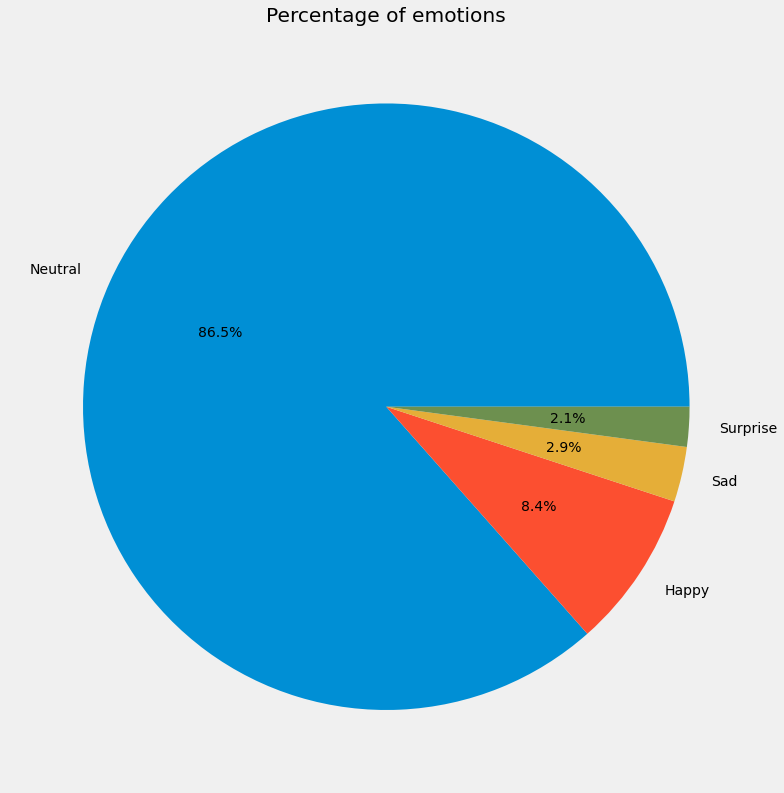

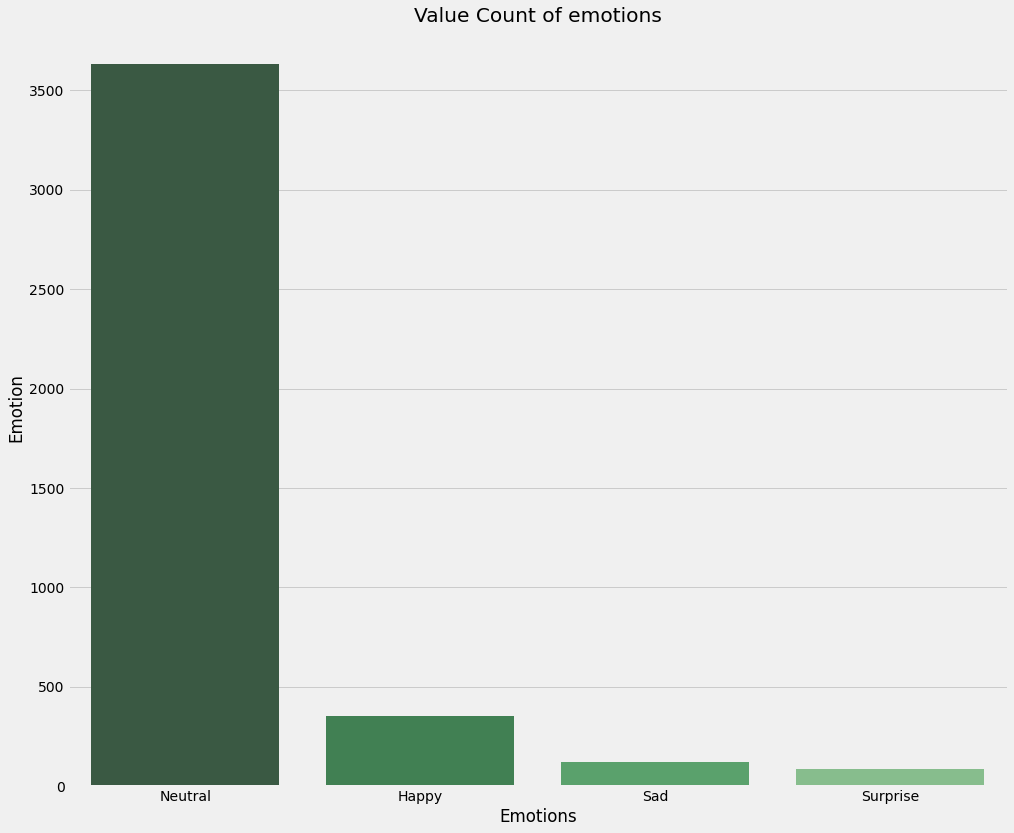

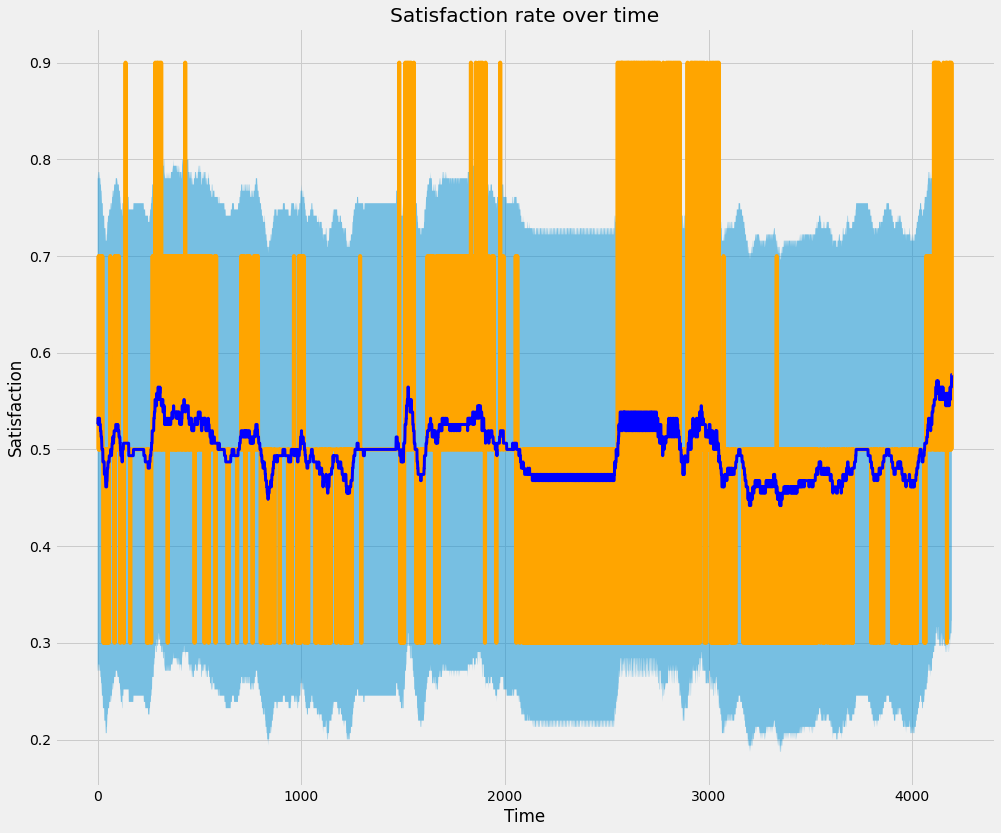

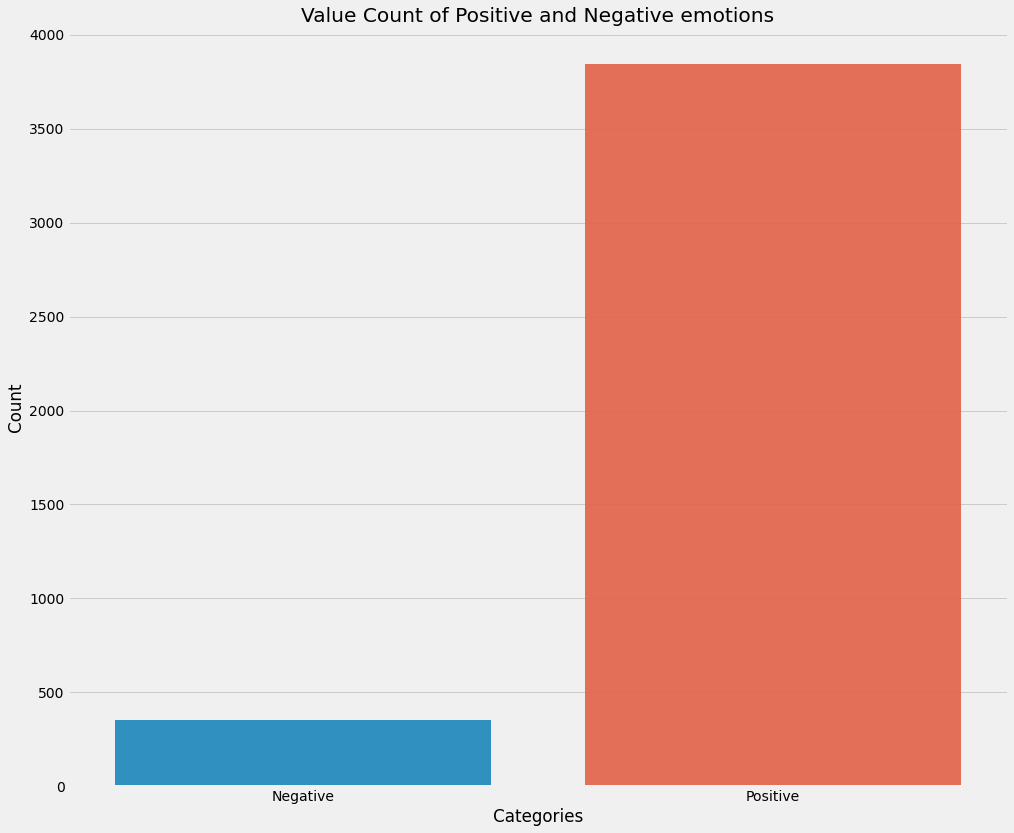

In [17]:
df = pd.read_csv('results.csv')
categories = ['Neutral','Happy','Sad','Surprise']

size = [df['class'].value_counts()[0], df['class'].value_counts()[1], df['class'].value_counts()[2], df['class'].value_counts()[3]]

# Pie chart
plt.figure(figsize=(15,13))
plt.title('Percentage of emotions')
plt.pie(size, labels=categories, autopct='%1.1f%%')
plt.savefig('graphs/pie.jpg')

# Barplot
plt.figure(figsize=(15,13))
sns.barplot(['Neutral', 'Happy', 'Sad', 'Surprise'], df['class'].value_counts(), palette='Greens_d')
plt.xlabel('Emotions')
plt.ylabel('Emotion')
plt.title('Value Count of emotions')
plt.savefig('bar.jpg')

# basic changes
#Creating a new column
df['ranking'] = np.zeros((df.shape[0],1))

for i in range(df.shape[0]):
    category = df['class'][i]
    
    if category == 'Happy':
        df['ranking'][i] = 0.9
    elif category == 'Surprise':
        df['ranking'][i] = 0.7
    elif category == 'Neutral':
        df['ranking'][i] = 0.5
    else:
        df['ranking'][i] = 0.3
        
smoother = ConvolutionSmoother(window_len=30, window_type='ones')
smoother.smooth(df['ranking'])

# generate intervals
low, up = smoother.get_intervals('sigma_interval', n_sigma=3)

# plot the smoothed timeseries with intervals
plt.figure(figsize=(15,13))
plt.plot(smoother.data[0], color='orange')
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Satisfaction')
plt.title('Satisfaction rate over time')
plt.savefig('graphs/dist.jpg')


# Basic changes
df['posneg'] = np.zeros((df.shape[0],1))

for i in range(df.shape[0]):
    if df['class'][i] =='Happy' or df['class'][i] == 'Surprise' or df['class'][i] == 'Neutral':
        df['posneg'][i] = 1
    else:
        df['posneg'][i] = 0

        
y = [df['posneg'].value_counts()[0], df['posneg'].value_counts()[1]]

plt.figure(figsize=(15,13))
sns.barplot(['Negative','Positive'],y, alpha=0.9)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Value Count of Positive and Negative emotions')
plt.savefig('graphs/posneg.jpg')

[!] Converting..


100%|██████████| 644/644 [00:02<00:00, 217.75it/s]


In [23]:
if alert==1:
        pygame.mixer.init()
        pygame.mixer.music.load("alert.wav")
        pygame.mixer.music.play()
        while pygame.mixer.music.get_busy() == True:
            continue        
        s.call(['notify-send', 'Detection Done!'])
        do = False